## Day 27 Lecture 2 Assignment

In this assignment, we will learn about interpreting linear models. We will use the google play store dataset loaded below and analyze the regression from this dataset.

In [69]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [70]:
reviews = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/googleplaystore.csv')

In [71]:
reviews.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


We will predict app ratings using other features describing the app. Recall from the previous assignment our data cleansing steps and do the following:

1. Remove the following columns: app, category, size, installs, genres, last updated, current ver, android ver
2. Convert all columns to numeric and remove rows where this conversion causes null values
3. Split the data into test and train subsets with 20% of the data in the test set
4. Normalize the data with QuantileTransformer. Many of the features are highly skewed.

In [72]:
# answer below:

df = reviews.drop(columns=['App', 'Category', 'Size', 'Installs', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver'])

df.shape

(10841, 5)

In [73]:

df.dropna(inplace=True)
df.isnull().sum()

df.shape

(9366, 5)

In [74]:
df = pd.concat([df, pd.get_dummies(df['Content Rating'], drop_first=True)], axis=1)
df = pd.concat([df, pd.get_dummies(df['Type'], drop_first=True)], axis=1)

In [75]:
df['Price'] = df.Price.str.strip('$')
df['Price'] = df.Price.str.strip()

In [76]:
df.drop(['Type', 'Content Rating'], axis=1, inplace=True)

In [77]:
cols = ['Price', 'Reviews']
df[cols] = df[cols].apply(pd.to_numeric, errors='raise', axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rating        9366 non-null   float64
 1   Reviews       9366 non-null   float64
 2   Price         9366 non-null   float64
 3   Everyone      9366 non-null   uint8  
 4   Everyone 10+  9366 non-null   uint8  
 5   Mature 17+    9366 non-null   uint8  
 6   Teen          9366 non-null   uint8  
 7   Unrated       9366 non-null   uint8  
 8   Paid          9366 non-null   uint8  
dtypes: float64(3), uint8(6)
memory usage: 347.6 KB


In [78]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import QuantileTransformer


In [79]:
qt = QuantileTransformer()

In [80]:
normal_data = pd.DataFrame(qt.fit_transform(df), columns = df.columns)
normal_data

,Rating,Reviews,Price,Everyone,Everyone 10+,Mature 17+,Teen,Unrated,Paid
0,0.311812,0.238238,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.174675,0.367708,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.909910,0.757087,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.739740,0.830364,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.508509,0.367708,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
9361,0.243744,0.050050,0.0,1.0,0.0,0.0,0.0,0.0,0.0
9362,0.739740,0.141642,0.0,1.0,0.0,0.0,0.0,0.0,0.0
9363,1.000000,0.028529,0.0,1.0,0.0,0.0,0.0,0.0,0.0
9364,0.739740,0.214214,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [81]:
X = normal_data.drop('Rating', axis=1)
y = normal_data.Rating
X = sm.add_constant(X)

X_train, x_test, Y_train, y_test = train_test_split(X, y, test_size=0.2)

In [82]:
results = sm.OLS(Y_train, X_train)
fit = results.fit()
print(fit.summary())

                            OLS Regression Results                            
Dep. Variable:                 Rating   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     40.30
Date:                Wed, 21 Oct 2020   Prob (F-statistic):           4.87e-56
Time:                        00:36:32   Log-Likelihood:                -1177.9
No. Observations:                7492   AIC:                             2372.
Df Residuals:                    7484   BIC:                             2427.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.3942      0.200      1.966   

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1755: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:1294: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


Create a linear regression model using statsmodels. Look at the coefficient values and their associated p values. Additionally, check model assumptions of homoscedacity, normality of errors, and multicollinearity.

bartlett BartlettResult(statistic=14725.941274942554, pvalue=0.0)
levene LeveneResult(statistic=12022.432442588339, pvalue=0.0)


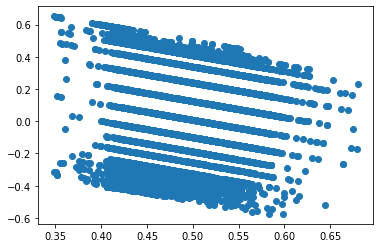

In [83]:
#answer below:
from scipy.stats import bartlett
from scipy.stats import levene

prediction = fit.predict(X_train)

residual = (Y_train-prediction)


bart_stats = bartlett(residual, prediction)

levstats = levene(residual, prediction)

plt.scatter(prediction, residual)

plt.show

print('bartlett', bart_stats)
print('levene', levstats)

In [84]:
#multicollinearity
X_train.corr()

,const,Reviews,Price,Everyone,Everyone 10+,Mature 17+,Teen,Unrated,Paid
const,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Reviews,NaN,1.000000,-0.189115,-0.185029,0.109834,0.039242,0.139029,NaN,-0.189523
Price,NaN,-0.189115,1.000000,0.043128,0.011661,-0.027668,-0.042902,NaN,0.999769
Everyone,NaN,-0.185029,0.043128,1.000000,-0.406922,-0.444634,-0.710206,NaN,0.043599
Everyone 10+,NaN,0.109834,0.011661,-0.406922,1.000000,-0.047005,-0.075080,NaN,0.011786
Mature 17+,NaN,0.039242,-0.027668,-0.444634,-0.047005,1.000000,-0.082038,NaN,-0.027971
Teen,NaN,0.139029,-0.042902,-0.710206,-0.075080,-0.082038,1.000000,NaN,-0.043371
Unrated,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Paid,NaN,-0.189523,0.999769,0.043599,0.011786,-0.027971,-0.043371,NaN,1.000000


Using the information above, try to select only the variables you think will lead to a better model and construct that model. Print out a summary

In [85]:
#answer below:
y = y = df['Rating']
X = df[['Reviews','Price']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

scaler = QuantileTransformer()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit(X_test)

X_train_scaled_constant = sm.add_constant(X_train_scaled)

results = sm.OLS(y_train, X_train_scaled_constant).fit()

results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Rating   R-squared:                       0.055
Model:                            OLS   Adj. R-squared:                  0.055
Method:                 Least Squares   F-statistic:                     217.9
Date:                Wed, 21 Oct 2020   Prob (F-statistic):           1.08e-92
Time:                        00:36:52   Log-Likelihood:                -5465.1
No. Observations:                7492   AIC:                         1.094e+04
Df Residuals:                    7489   BIC:                         1.096e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.9671      0.012    327.410      0.000       3.943       3.991
x1             0.4211      0.020     20.598      0.000       0.381       0.461
x2             0.1727      0.024      7.170      0.000       0.126       0.220
==============================================================================
Omnibus:                     2223.001   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9637.788
Skew:                          -1.394   Prob(JB):                         0.00
Kurtosis:                       7.807   Cond. No.                         5.08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Plot the scatterplots between the independent variables you select and ratings. Do you think given these graphs, these variables have good predictive power? 

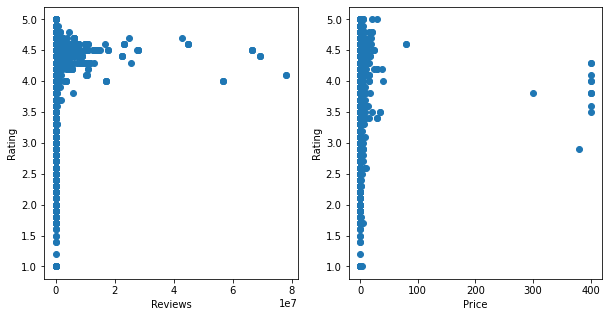

In [86]:
# answer below:

plot_number = 1
plt.figure(figsize=[10, 5])
for col in X_train.columns:
    plt.subplot(1, 2, plot_number)
    plot_number += 1
    plt.scatter(X_train[col], y_train)
    plt.xlabel(col)
    plt.ylabel("Rating")

What data processing could you do to improve this model? Experiment.

In [ ]:
#Looking for other varibles that could change the model such as Category or Genere 